In [229]:
#load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit, expit
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [230]:
# normal distribution

# some util function

def probability_density_function(mu, sigma, bins):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

def params_to_tile(mu, sigma, bins_size):
    return f"mu: {mu}, sigma: {sigma}, bins size: {bins_size}"

def title_to_params(title):
    mu, sigma, bins_size = tuple([params for part_title in title.split(",") for params in part_title.split(":")][1::2])
    return (np.float(mu), np.float(sigma), np.int(bins_size))

def to_histogram(data, bins_size):
    return np.histogram(data, bins_size)

def to_cumulative(data, bins_size):
    hist, bins = to_histogram(data, bins_size)
    return np.cumsum(hist), bins

def decorate_plot(p, title, x_label, y_label, grid=True):
    p.set_title(title)
    p.set_xlabel(x_label)
    p.set_ylabel(y_label)
    p.grid(True)
        

In [231]:
MUs = [0.0, 0.0, 0.0,0.0,10.0, 10.0, 10.0, 10.0]
SIGMAs = [1.0, 1.0, 5.0, 5.0, 1.0, 1.0, 5.0, 5.0]
BINs = [100, 500, 100, 500, 100, 500, 100, 500]

MAX_MU = max(MUs)
MAX_SIGMA  =max(SIGMAs)

parameters = []
for params in zip(MUs, SIGMAs, BINs):
    parameters.append({'mu': params[0], 'sigma': params[1], "bins size" : params[2]})

In [232]:
df = pd.DataFrame()
for param_set in parameters:
    mu, sigma, bins_size = param_set['mu'], param_set['sigma'], param_set['bins size']
    df[params_to_tile(mu, sigma, bins_size)] = np.random.normal(loc=mu,scale=sigma, size=size)

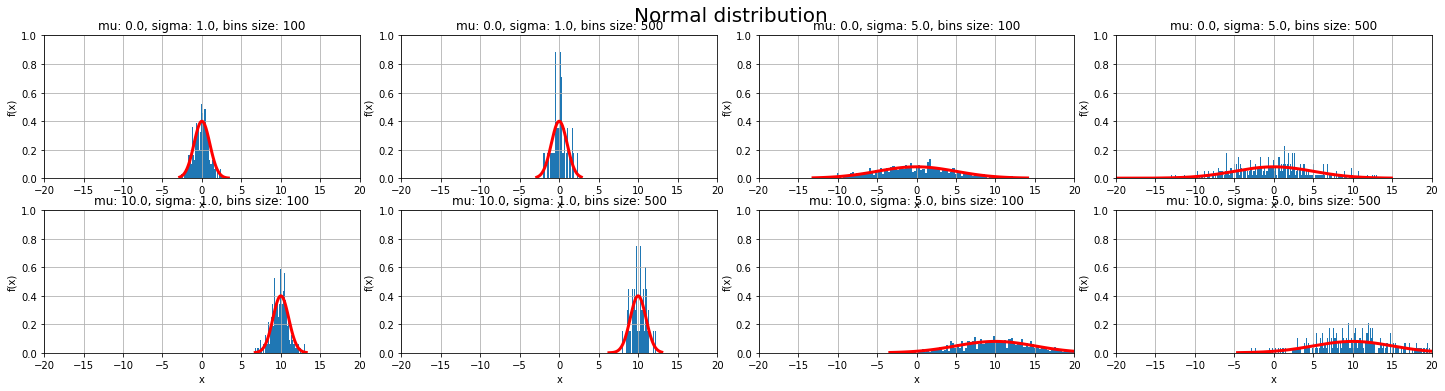

In [233]:
fig, axes = plt.subplots(2, 4, figsize=(20,5))
fig.tight_layout()
fig.suptitle('Normal distribution', y=1.04, fontsize=20)
    
for i, col in enumerate(df):
    current_plot = axes[int(i/4)][i%4]
    current_plot.set_ylim(0,1)
    current_plot.set_xlim(-20,20)
    mu, sigma, bins_size = title_to_params(col)
    n, bins, ignored = current_plot.hist(df[col], bins=bins_size, density=True, cumulative=False)
    current_plot.plot(bins, probability_density_function(mu, sigma, bins), linewidth=3, color='r')
    decorate_plot(current_plot, col, "x", "f(x)")
    
    
# We have more certaninty of expected value when sigma parameter is less.
# Less number of bins affected smoothness of plot.

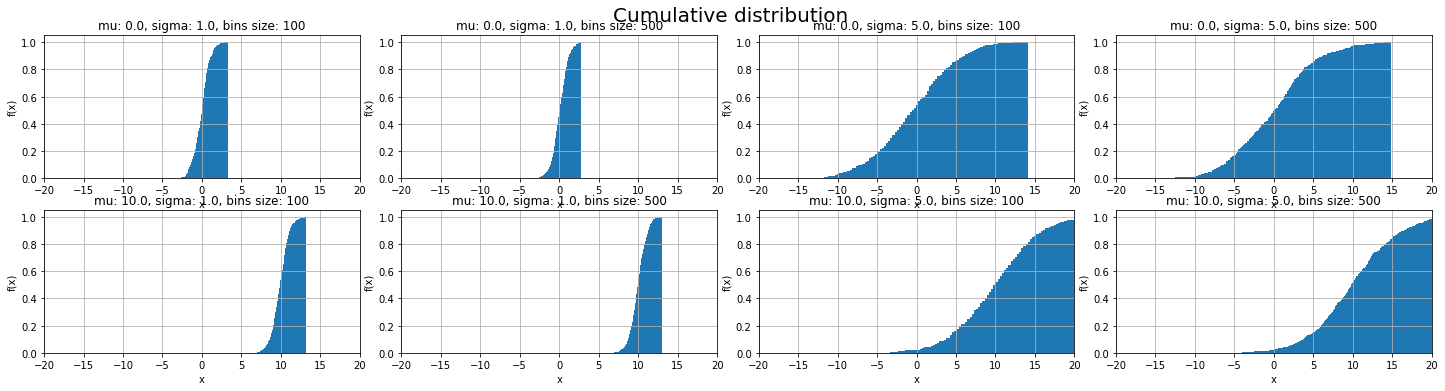

In [234]:
for i, col in enumerate(df):
    current_plot = axes[int(i/4)][i%4]
    current_plot.set_xlim(-20, 20)
    _, _, bins_size = title_to_params(col)
    n, bins, ignored = current_plot.hist(df[col], bins=bins_size, density=True, cumulative=True)
    cumulative[col]= n
    decorate_plot(current_plot, col, "x", "f(x)")
# Cumulative distribiution of histogram is a integral of the propability function. 

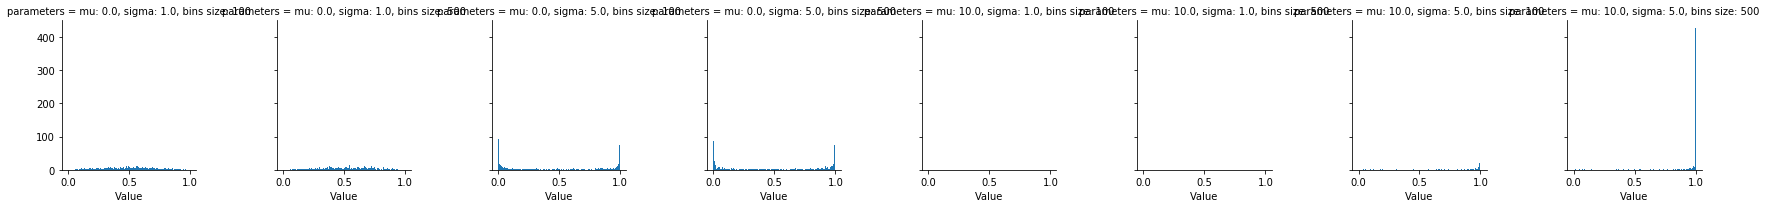

In [247]:
expit_df = expit(df)
expit_dfmelt = pd.melt(expit_df,var_name='parameters',value_name='Value')

g = sns.FacetGrid(expit_dfmelt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=128)

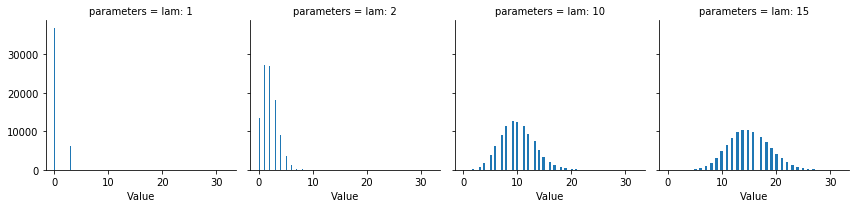

In [204]:
# Poisson Distribiution

# Is type of discrete distribiution. Lamda is expected value witch was used to create array of samples.
# Standart deviation is the root mean square of expected value. 
LAMs = [1,2,10,15]

df_poisson = pd.DataFrame()
for lam in LAMs:
    df_poisson[f"lam: {lam}"] = np.random.poisson(lam=lam, size=100000)
    
df_poisson_melt = pd.melt(df_poisson, var_name='parameters',value_name='Value')


g = sns.FacetGrid(df_poisson_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=False,bins=64)

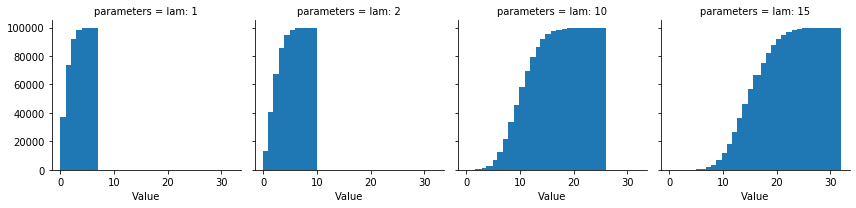

In [217]:
g = sns.FacetGrid(df_poisson_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',cumulative=True,bins=64)

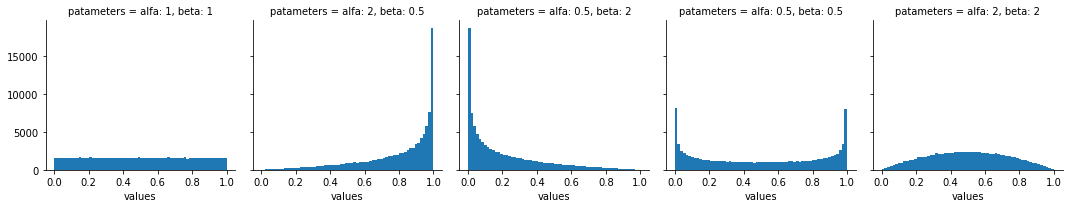

In [250]:
# Beta distribution

"""

    Beta distribution is continuous probability distributions defined on the interval (0,1).
    Shape of distribtion is controlled by two parameters. 
    Expected value also depends on them, because it is equal alpha/(alpha+beta).
    As in previous cases DataFrame contains beta distributions was created.
    It allows to observe change of shape depanding on value of this parameters.
    
"""

ALFAs = [1, 2, 0.5, 0.5,2]
BETAs = [1, 0.5, 2 ,0.5, 2]

beta_distribution = {}
for alfa, beta in zip(ALFAs, BETAs):
    beta_distribution[f"alfa: {alfa}, beta: {beta}"] = np.random.beta(a=alfa,b=beta,size=100000)
    

df_beta = pd.DataFrame(data=beta_distribution)

df_beta_melt = pd.melt(df_beta,var_name='patameters',value_name='values')

g = sns.FacetGrid(df_beta_melt,col='patameters',sharex=True)
g.map(plt.hist,'values',cumulative=False,bins=64)

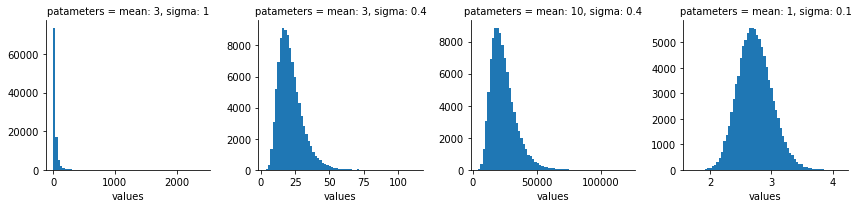

In [249]:
"""

It is distribution for positive values.  Its shape depend on mean and sigma value.
As in previous cases DataFrame contains beta distributions was created.
This distribution is similar to normal distribution without negative values.


"""

MEANs = [3, 3, 10, 1]
SIGMAs = [1, 0.4, 0.4, 0.1]

log_normal_distribution = {}

for mean, sigma in zip(MEANs, SIGMAs):
    log_normal_distribution[f"mean: {mean}, sigma: {sigma}"]=np.random.lognormal(mean=mean,sigma=sigma,size=100000)

df_log_normal_distribution= pd.DataFrame(data=log_normal_distribution)
df_log_normal_melt = pd.melt(df_log_normal_distribution,var_name='patameters',value_name='values')

g = sns.FacetGrid(df_log_normal_melt,col='patameters',sharex=False,sharey=False)
g.map(plt.hist,'values',cumulative=False,bins=64)